# Python_7027_HW1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1st part: poly regression; cubic spline; natural cubic spline

In [3]:
auto_df = pd.read_csv('auto.csv')
auto_df['horsepower'] = auto_df['horsepower']+ np.random.normal(0, 1e-10, len(auto_df['horsepower']))
auto_df_sorted = auto_df.sort_values(by='horsepower')
df_horsepower=auto_df_sorted['horsepower']
df_mpg=auto_df_sorted['mpg']
x=df_horsepower.tolist()
y=df_mpg.tolist()

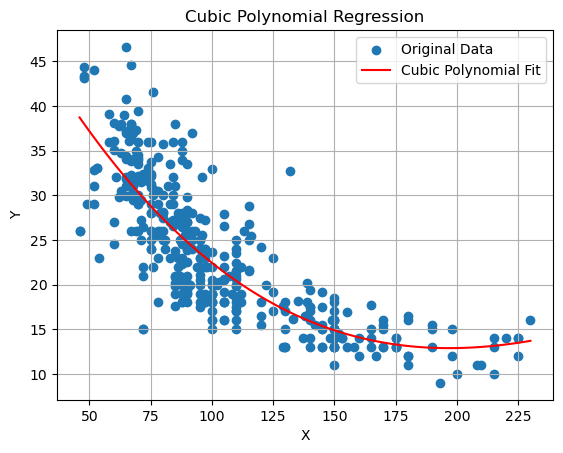

In [4]:
#(a) The polynomial regression
coefficients = np.polyfit(df_horsepower, df_mpg, 3)
polynomial = np.poly1d(coefficients)

# Generate data points for the fitted curve
x=df_horsepower.tolist()
y=df_mpg.tolist()
x_fit = np.linspace(df_horsepower.min(), df_horsepower.max(), 100)
y_fit = polynomial(x_fit)

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Cubic Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
print(y)

[26.0, 26.0, 43.4, 44.3, 43.1, 29.0, 29.0, 32.8, 44.0, 31.0, 33.0, 33.0, 23.0, 39.1, 36.0, 35.1, 36.1, 24.5, 27.0, 38.1, 32.0, 29.8, 37.7, 34.7, 30.5, 38.0, 39.0, 31.8, 46.6, 31.0, 34.4, 37.2, 29.9, 32.0, 40.8, 37.0, 34.1, 36.1, 31.0, 26.0, 33.8, 38.0, 30.0, 30.0, 36.4, 32.3, 38.0, 31.0, 44.6, 32.0, 34.1, 30.0, 29.5, 37.0, 31.0, 31.5, 26.0, 35.0, 37.3, 34.2, 29.0, 29.0, 26.0, 30.0, 39.4, 32.0, 32.1, 36.0, 34.5, 33.5, 34.0, 25.0, 27.2, 31.5, 31.9, 29.5, 32.4, 15.0, 22.0, 21.0, 15.0, 26.5, 33.0, 36.0, 31.6, 30.9, 28.0, 28.0, 25.0, 31.3, 29.0, 26.0, 26.0, 24.0, 33.7, 24.0, 32.4, 32.2, 36.0, 41.5, 30.7, 22.0, 30.0, 25.4, 29.0, 18.0, 26.0, 30.5, 23.0, 34.3, 28.0, 26.0, 35.7, 28.0, 26.0, 25.0, 28.1, 30.0, 27.4, 24.0, 25.0, 31.0, 27.0, 33.5, 29.0, 23.0, 27.2, 30.0, 32.0, 36.0, 29.0, 26.6, 38.0, 20.8, 19.8, 21.0, 20.2, 31.0, 23.8, 17.6, 19.0, 21.0, 23.0, 28.0, 27.0, 22.0, 25.0, 21.0, 27.0, 18.0, 18.0, 25.1, 20.2, 19.0, 27.0, 24.5, 23.0, 28.0, 26.4, 27.0, 19.0, 22.3, 36.0, 27.0, 35.0, 20.0, 34.

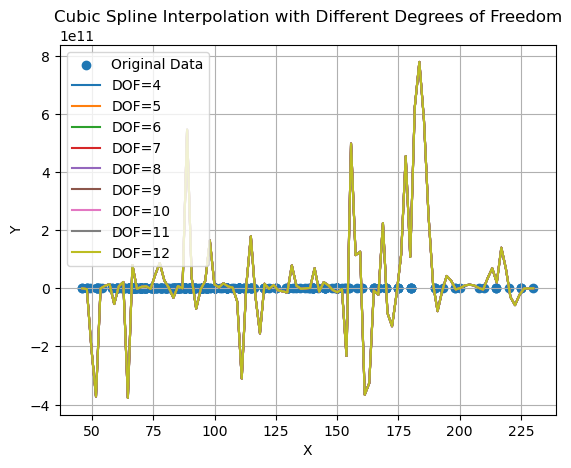

In [16]:
#cubic spline with different degree of freedom
from scipy.interpolate import CubicSpline
dofs = [4,5,6,7,8,9,10,11,12]
# Create a figure and axis object
fig, ax = plt.subplots()
# Plot the original data
ax.scatter(x, y, label='Original Data')
# Iterate over the degrees of freedom and plot the corresponding cubic spline curve

for dof in dofs:
    # Perform cubic spline interpolation
    cs = CubicSpline(x, y,bc_type='natural')   
    # Generate data points for the fitted curve
    x_fit = np.linspace(df_horsepower.min(), df_horsepower.max(), 100)
    y_fit = cs(x_fit)
    
    # Plot the fitted curve
    ax.plot(x_fit, y_fit, label=f'DOF={dof}')

# Add labels, title, legend, and grid to the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Cubic Spline Interpolation with Different Degrees of Freedom')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

工程说明：最终实验结果不可用
因为python scipy.interpolate.CubicSpline会自动把所有样本点视为knots（分界点），导致两个同x的样本点会拟合出系数极大的三次方程。
目前尚未找到合适的替代方法，实验终止。希望以后可以解决。

# 2nd Part:SVM

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [32]:
boston_data = pd.read_csv('boston.csv')
boston_data.head()
y=boston_data['crimAbvMed']
X=boston_data.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# 核函数为 linear 
# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Linear Model Results')
print("Best C:", grid_search.best_params_['C'])

# Predict the classes for the test set using the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Print the accuracy of the best model
accuracy = best_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Linear Model Results
Best C: 100
Accuracy: 0.8627450980392157
[[44  7]
 [ 7 44]]


In [34]:
# 核函数为 radial
# Create an SVM classifier
clf2 = svm.SVC(kernel='rbf')

# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [0.5,1,2,3,4]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Radial Model Results')
print("Best C:", grid_search.best_params_['C'])
print("Best gamma:", grid_search.best_params_['gamma'])

# Predict the classes for the test set using the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Print the accuracy of the best model
accuracy = best_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Radial Model Results
Best C: 10
Best gamma: 0.5
Accuracy: 0.5686274509803921
[[51  0]
 [44  7]]


In [35]:
# 核函数为polynomial
# Create an SVM classifier
clf3 = svm.SVC(kernel='poly')

# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100],'degree': [2,3,4]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf3, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Polynomial Model Results')
print("Best C:", grid_search.best_params_['C'])
print("Best degree:", grid_search.best_params_['degree'])

# Predict the classes for the test set using the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Print the accuracy of the best model
accuracy = best_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Polynomial Model Results
Best C: 100
Best degree: 4
Accuracy: 0.8431372549019608
[[43  8]
 [ 8 43]]


conclusion
Linear Model with hyperparameter C: 100  is the best model
Its Accuracy: 0.8627450980392157
Its confusion matrix:  [[44  7]
                        [ 7 44]]